<a href="https://colab.research.google.com/github/robiulxasan/Kidney-Disease/blob/main/Kidney_Disease_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/robiulxasan/Kidney-Disease.git

fatal: destination path 'Kidney-Disease' already exists and is not an empty directory.


In [ ]:
!ls

Kidney-Disease	sample_data


In [ ]:
path= 'Kidney-Disease/kidney_disease-1.csv'

In [ ]:
import numpy as np 
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt 
import  seaborn as sna
df= pd.read_csv(path)
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000.0,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300.0,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,7800.0,4.4,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
# Mapping the text to 1/0 and cleaning the dataset 
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [ ]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv        int64
wc       float64
rc       float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object

In [ ]:
df.isna().values.any()

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    349 non-null    float64
 15  pcv     400 non-null    int64  
 16  wc      397 non-null    float64
 17  rc      400 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Actual numbers in the database')

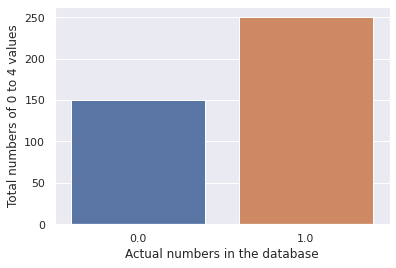

In [ ]:
sna.countplot(df['class'])
plt.ylabel('Total numbers of 0 to 4 values')
plt.xlabel('Actual numbers in the database')

Text(0.5, 0, 'Convert them into 0 and 1')

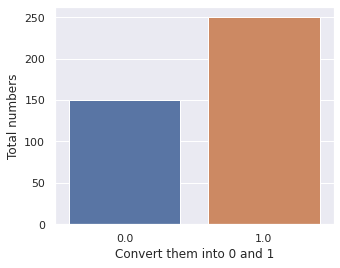

In [ ]:
#sna.countplot(df['Power'], label = 'count')
plt.figure(figsize=(5,4))
sna.set(style="darkgrid")
ax = sna.countplot(x="class", data=df)
plt.ylabel('Total numbers')
plt.xlabel('Convert them into 0 and 1')

In [ ]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
s_imputer =SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
s_imputer =s_imputer.fit(df.iloc[:, 0:15])
df.iloc[:, 0:15]=s_imputer.transform(df.iloc[:, 0:15])

from sklearn.impute import SimpleImputer
s_imputer =SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
s_imputer =s_imputer.fit(df.iloc[:, 16:17])
df.iloc[:, 16:17]=s_imputer.transform(df.iloc[:, 16:17])

from sklearn.impute import SimpleImputer
s_imputer =SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
s_imputer =s_imputer.fit(df.iloc[:, 18:24])
df.iloc[:, 18:24]=s_imputer.transform(df.iloc[:, 18:24])

In [ ]:
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

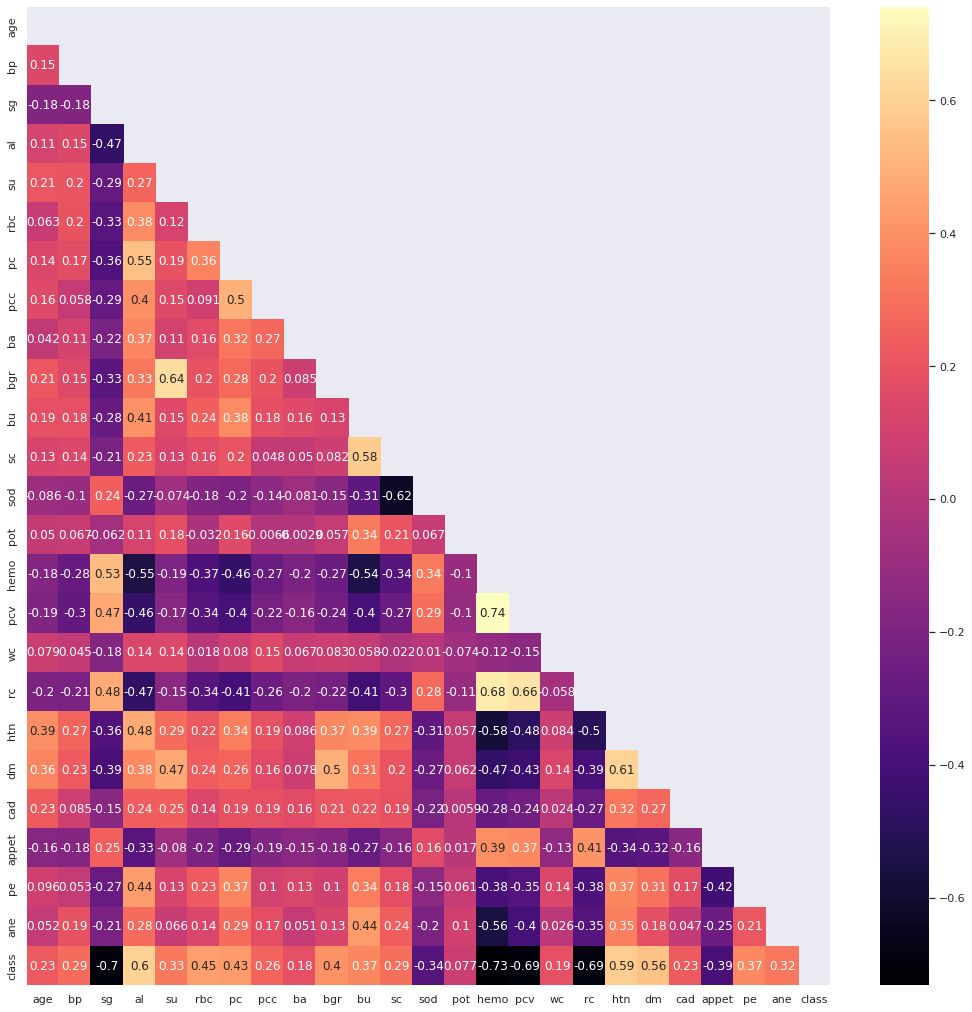

In [ ]:
plt.figure(figsize=(18,18))
matrix = np.triu(df.corr())
sna.heatmap(df.corr(), annot=True,cmap="magma", mask=matrix)
plt.show()

In [ ]:
import pandas as pd
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.522727,0.230769,0.75,0.2,0.0,0.189516,0.000000,0.0,0.0,0.211538,...,0.777778,0.231405,0.525424,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.056818,0.000000,0.75,0.8,0.0,0.189516,0.000000,0.0,0.0,0.269309,...,0.644444,0.157025,0.525424,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.681818,0.230769,0.25,0.4,0.6,0.000000,0.000000,0.0,0.0,0.856838,...,0.488889,0.219008,0.525424,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,0.000000,1.000000,1.0,0.0,0.202991,...,0.511111,0.185950,0.305085,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,0.000000,0.000000,0.0,0.0,0.179487,...,0.577778,0.210744,0.423729,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.659091,0.307692,0.50,0.6,0.0,0.189516,0.226866,0.0,0.0,0.111111,...,0.666667,0.231405,0.389831,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,0.750000,0.153846,0.25,0.0,0.0,0.189516,0.000000,0.0,0.0,0.166667,...,0.600000,0.231405,0.389831,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,0.250000,0.203608,0.50,0.4,0.8,0.000000,1.000000,0.0,0.0,0.829060,...,0.777778,0.194215,0.491525,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,0.568182,0.384615,0.50,0.6,0.0,0.000000,1.000000,1.0,0.0,0.247863,...,0.533333,0.305785,0.322034,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,0.579545,0.307692,0.75,0.4,0.0,1.000000,1.000000,1.0,0.0,0.102564,...,0.444444,0.409091,0.271186,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,shuffle=True,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train.shape

(320, 24)

In [ ]:
Y_test.shape

(80,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier(n_estimators = 10, max_features=24, criterion='entropy', random_state = 42)
random_forest.fit(X_train, Y_train)
random_forest.score(X_test, Y_test)

In [ ]:
#Applying StandardScaler
scaler = StandardScaler()

In [ ]:
#Reshaping the dataset to 3-D to pass it through CNN
X_train = X_train.reshape(320,24,1)
X_test = X_test.reshape(80,24,1)

## **OCNN**

In [ ]:
import tensorflow as tf 
import time
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras import regularizers
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv1D, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from sklearn.metrics import confusion_matrix 
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax, Nadam

#Preparing the CNN model
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,kernel_initializer='normal', kernel_regularizer= regularizers.l2(0.01),activation='relu',input_shape=(24,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(16,1,kernel_initializer='normal', kernel_regularizer= regularizers.l2(0.01),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(16,kernel_initializer='normal', kernel_regularizer= regularizers.l2(0.01),activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(8,kernel_initializer='normal', kernel_regularizer= regularizers.l2(0.01),activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(1,kernel_initializer='normal', kernel_regularizer= regularizers.l2(0.01),activation='sigmoid'))
print(model.summary())
start = time.time()
model.compile(loss='mse', optimizer='adam') #adam
print('Compilation time: ', time.time() - start)
start = time.time()

model.compile(optimizer=Adam(learning_rate=0.1),loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 16)            48        
                                                                 
 batch_normalization (BatchN  (None, 23, 16)           64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 23, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 16)            272       
                                                                 
 batch_normalization_1 (Batc  (None, 23, 16)           64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 23, 16)            0

In [ ]:
history = model.fit(X_train,Y_train,epochs=8,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/8
10/10 [==============================] - 0s 10ms/step - loss: 0.2668 - accuracy: 0.9812 - val_loss: 0.2943 - val_accuracy: 0.9750
Epoch 2/8
10/10 [==============================] - 0s 7ms/step - loss: 0.2665 - accuracy: 0.9750 - val_loss: 0.3200 - val_accuracy: 0.9625
Epoch 3/8
10/10 [==============================] - 0s 6ms/step - loss: 0.4168 - accuracy: 0.9375 - val_loss: 0.3286 - val_accuracy: 0.9750
Epoch 4/8
10/10 [==============================] - 0s 6ms/step - loss: 0.3567 - accuracy: 0.9750 - val_loss: 0.3805 - val_accuracy: 0.9375
Epoch 5/8
10/10 [==============================] - 0s 6ms/step - loss: 0.3295 - accuracy: 0.9750 - val_loss: 0.2546 - val_accuracy: 0.9875
Epoch 6/8
10/10 [==============================] - 0s 6ms/step - loss: 0.2443 - accuracy: 0.9812 - val_loss: 0.2532 - val_accuracy: 0.9750
Epoch 7/8
10/10 [==============================] - 0s 6ms/step - loss: 0.1997 - accuracy: 0.9812 - val_loss: 0.2402 - val_accuracy: 0.9625
Epoch 8/8
10/10 [=========

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

3/3 [==============================] - 0s 4ms/step - loss: 0.1998 - accuracy: 0.9875
Accuracy: 98.75%


In [ ]:
#Plots of Accuracy and Loss
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

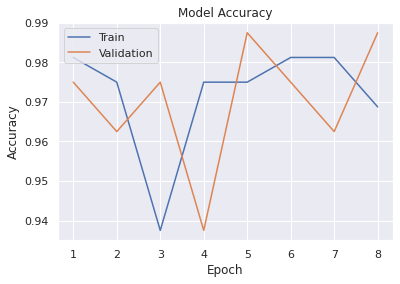

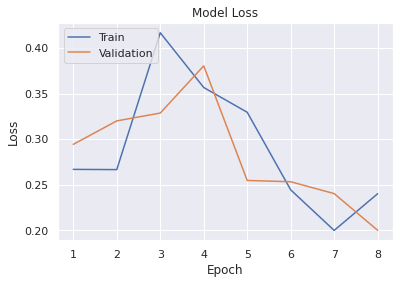

In [ ]:
plotLearningCurve(history,8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
y_true, y_pred = Y_test , model.predict(X_test)

print('Results on the test set:')
y_pred = y_pred.round()
print(classification_report(y_true, y_pred))

cm7 = confusion_matrix(y_true, y_pred)
 
TP = cm7[0][0]
TN = cm7[1][1]
FP = cm7[0][1]
FN = cm7[1][0]

var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN)*100)
print('Specificity : ', TN/(TN+FP)*100)
print('Precision : ', TP/(TP+FP)*100)
print('false positive rate : ', FP/(FP+TN)*100)
print('false negative rate : ', FN/(FN+TP)*100)
print('Negative Predictive Value : ', TN/(TN+FN)*100)
print('False Discovery rate : ', FP/(TP+FP)*100)
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred)*100)
#print('Mean Squared Error:', metrics.mean_squared_error(y_true, y_pred)*100)
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true, y_pred))*100)
#print('Log_Loss:', metrics.log_loss(y_true, y_pred)*100)
#print('Cohen_Kappa_Score:', metrics.cohen_kappa_score(y_true, y_pred)*100)

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        28
         1.0       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Testing accuracy :  98.75
Sensitivity :  96.55172413793103
Specificity :  100.0
Precision :  100.0
false positive rate :  0.0
false negative rate :  3.4482758620689653
Negative Predictive Value :  98.07692307692307
False Discovery rate :  0.0
Mean Absolute Error: 1.25
Mean Squared Error: 1.25
Root Mean Squared Error: 11.180339887498949


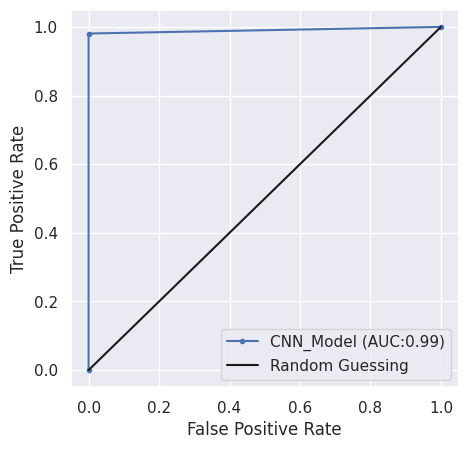

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_true, y_pred) 
fig, ax1 = plt.subplots(1,1, figsize = (5, 5), dpi = 100)
ax1.plot(fpr, tpr, 'b.-', label = 'CNN_Model (AUC:%2.2f)' % roc_auc_score(y_true, y_pred))
ax1.plot(fpr, fpr, 'k-', label = 'Random Guessing')
ax1.legend(loc = 4)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');
fig.savefig('roc.pdf')

## **OANN**

In [ ]:
import tensorflow as tf 
import time
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

def create_model():
    classifier = Sequential() 
    classifier.add(Dense(activation = "relu", input_dim = 24, units = 8, kernel_initializer = "uniform"))
#classifier.add(Dense(activation = "relu", units = 28,  
                    # kernel_initializer = "uniform"))  
    classifier.add(Dense(activation = "relu", units = 18, kernel_initializer = "uniform")) 
    classifier.add(Dense(activation = "sigmoid", units = 1,  
 kernel_initializer = "uniform")) 

    start = time.time()
    classifier.compile(loss='mse', optimizer='adam')
    print('compilation time : ', time.time() - start)
    
    adam = Adam(lr=0.09)
    classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',  
                   metrics = ['accuracy'] ) 

    return classifier
classifier = create_model()
print(classifier.summary()) 

compilation time :  0.004059553146362305
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 8)                 200       
                                                                 
 dense_67 (Dense)            (None, 18)                162       
                                                                 
 dense_68 (Dense)            (None, 1)                 19        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = classifier.fit(X_train,Y_train,epochs=8,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/8
10/10 [==============================] - 0s 8ms/step - loss: 0.2483 - accuracy: 0.9625 - val_loss: 0.2115 - val_accuracy: 0.9500
Epoch 2/8
10/10 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.9594 - val_loss: 0.1926 - val_accuracy: 0.9500
Epoch 3/8
10/10 [==============================] - 0s 6ms/step - loss: 0.2064 - accuracy: 0.9563 - val_loss: 0.1762 - val_accuracy: 0.9500
Epoch 4/8
10/10 [==============================] - 0s 5ms/step - loss: 0.1878 - accuracy: 0.9563 - val_loss: 0.1610 - val_accuracy: 0.9500
Epoch 5/8
10/10 [==============================] - 0s 5ms/step - loss: 0.1686 - accuracy: 0.9656 - val_loss: 0.1469 - val_accuracy: 0.9500
Epoch 6/8
10/10 [==============================] - 0s 7ms/step - loss: 0.1507 - accuracy: 0.9719 - val_loss: 0.1335 - val_accuracy: 0.9500
Epoch 7/8
10/10 [==============================] - 0s 5ms/step - loss: 0.1346 - accuracy: 0.9719 - val_loss: 0.1214 - val_accuracy: 0.9500
Epoch 8/8
10/10 [==========

In [ ]:
# Final evaluation of the model
scores = classifier.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

3/3 [==============================] - 0s 3ms/step - loss: 0.2425 - accuracy: 0.9625
Accuracy: 96.25%


In [ ]:
#Plots of Accuracy and Loss
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

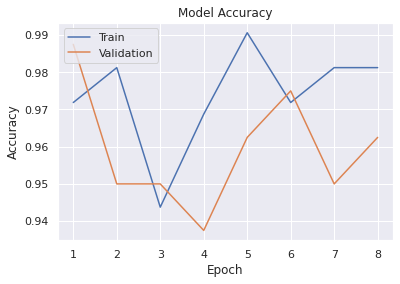

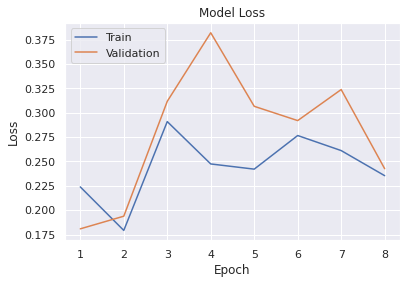

In [ ]:
plotLearningCurve(history,8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
y_true, y_pred = Y_test , classifier.predict(X_test)

print('Results on the test set:')
y_pred = y_pred.round()
print(classification_report(y_true, y_pred))

cm7 = confusion_matrix(y_true, y_pred)
 
TP = cm7[0][0]
TN = cm7[1][1]
FP = cm7[0][1]
FN = cm7[1][0]

var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN)*100)
print('Specificity : ', TN/(TN+FP)*100)
print('Precision : ', TP/(TP+FP)*100)
print('false positive rate : ', FP/(FP+TN)*100)
print('false negative rate : ', FN/(FN+TP)*100)
print('Negative Predictive Value : ', TN/(TN+FN)*100)
print('False Discovery rate : ', FP/(TP+FP)*100)
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred)*100)
#print('Mean Squared Error:', metrics.mean_squared_error(y_true, y_pred)*100)
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true, y_pred))*100)
#print('Log_Loss:', metrics.log_loss(y_true, y_pred)*100)
#print('Cohen_Kappa_Score:', metrics.cohen_kappa_score(y_true, y_pred)*100)

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        28
         1.0       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Testing accuracy :  96.25
Sensitivity :  90.32258064516128
Specificity :  100.0
Precision :  100.0
false positive rate :  0.0
false negative rate :  9.67741935483871
Negative Predictive Value :  94.23076923076923
False Discovery rate :  0.0
Mean Absolute Error: 3.75
Mean Squared Error: 3.75
Root Mean Squared Error: 19.364916731037084


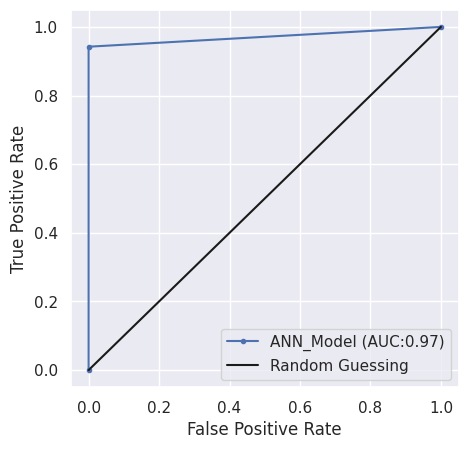

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_true, y_pred) 
fig, ax1 = plt.subplots(1,1, figsize = (5, 5), dpi = 100)
ax1.plot(fpr, tpr, 'b.-', label = 'ANN_Model (AUC:%2.2f)' % roc_auc_score(y_true, y_pred))
ax1.plot(fpr, fpr, 'k-', label = 'Random Guessing')
ax1.legend(loc = 4)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');
fig.savefig('roc.pdf')

## **OLSTM**

In [ ]:
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [ ]:
X_train = X_train.reshape(320,24,1)
X_test = X_test.reshape(80,24,1)

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=64, activation= 'relu', kernel_initializer= 'uniform', return_sequences = True, input_shape=(X_train.shape[1],X_train.shape[2])))
regressor.add(Dropout(0.5))
# Second LSTM layer
regressor.add(LSTM(units=32,activation= 'relu', return_sequences=True))
regressor.add(Dropout(0.1))
# Third LSTM layer
regressor.add(LSTM(units=24, return_sequences=True))
regressor.add(Dropout(0.08))
# Fourth LSTM layer
regressor.add(LSTM(units=64))
regressor.add(Dropout(0.8))
# The output layer
regressor.add(Dense(units=1))


regressor.compile(optimizer="adam",loss="binary_crossentropy", metrics=['accuracy'])
print('compilation time : ', time.time() - start)
# Fitting to the training set
#regressor.fit(X_train,Y_train, batch_size=8, epochs=20,verbose=1,validation_split=0.10)
history = regressor.fit(X_train,Y_train,batch_size=8, epochs=8,verbose=1,validation_data=(X_test,Y_test))

compilation time :  0.005278110504150391
Epoch 1/8
10/10 [==============================] - 0s 12ms/step - loss: 0.8814 - accuracy: 0.9250 - val_loss: 0.6917 - val_accuracy: 0.9625
Epoch 2/8
10/10 [==============================] - 0s 7ms/step - loss: 0.6274 - accuracy: 0.9375 - val_loss: 0.5137 - val_accuracy: 0.9250
Epoch 3/8
10/10 [==============================] - 0s 9ms/step - loss: 0.4369 - accuracy: 0.9531 - val_loss: 0.7491 - val_accuracy: 0.8125
Epoch 4/8
10/10 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 0.9563 - val_loss: 0.2737 - val_accuracy: 0.9875
Epoch 5/8
10/10 [==============================] - 0s 7ms/step - loss: 0.3263 - accuracy: 0.9719 - val_loss: 0.2850 - val_accuracy: 0.9625
Epoch 6/8
10/10 [==============================] - 0s 7ms/step - loss: 0.3142 - accuracy: 0.9531 - val_loss: 0.2136 - val_accuracy: 0.9875
Epoch 7/8
10/10 [==============================] - 0s 9ms/step - loss: 0.2408 - accuracy: 0.9625 - val_loss: 0.1937 - val_ac

In [ ]:
# Final evaluation of the model
scores = regressor.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

3/3 [==============================] - 0s 5ms/step - loss: 0.1876 - accuracy: 0.9750
Accuracy: 97.50%


In [ ]:
#Plots of Accuracy and Loss
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

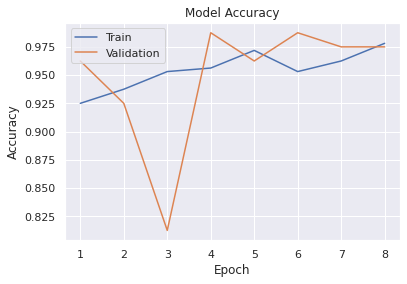

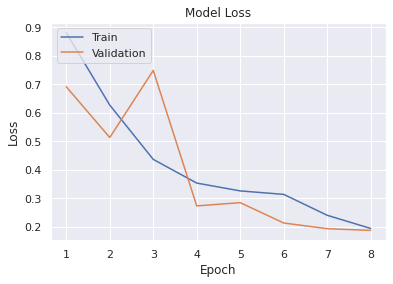

In [ ]:
plotLearningCurve(history,8)

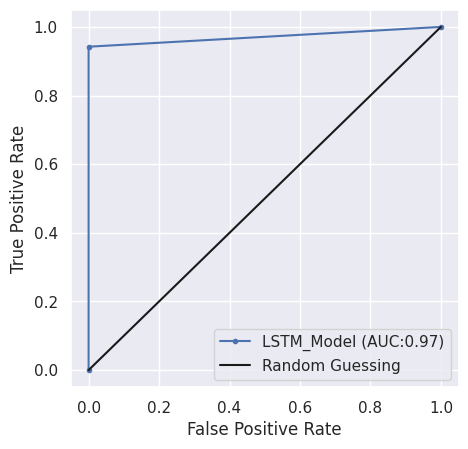

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_true, y_pred) 
fig, ax1 = plt.subplots(1,1, figsize = (5, 5), dpi = 100)
ax1.plot(fpr, tpr, 'b.-', label = 'LSTM_Model (AUC:%2.2f)' % roc_auc_score(y_true, y_pred))
ax1.plot(fpr, fpr, 'k-', label = 'Random Guessing')
ax1.legend(loc = 4)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');
fig.savefig('roc.pdf')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
y_true, y_pred = Y_test , regressor.predict(X_test)

print('Results on the test set:')
y_pred = y_pred.round()
print(classification_report(y_true, y_pred))

cm7 = confusion_matrix(y_true, y_pred)
 
TP = cm7[0][0]
TN = cm7[1][1]
FP = cm7[0][1]
FN = cm7[1][0]

var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN)*100)
print('Specificity : ', TN/(TN+FP)*100)
print('Precision : ', TP/(TP+FP)*100)
print('false positive rate : ', FP/(FP+TN)*100)
print('false negative rate : ', FN/(FN+TP)*100)
print('Negative Predictive Value : ', TN/(TN+FN)*100)
print('False Discovery rate : ', FP/(TP+FP)*100)
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred)*100)
#print('Mean Squared Error:', metrics.mean_squared_error(y_true, y_pred)*100)
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true, y_pred))*100)
#print('Log_Loss:', metrics.log_loss(y_true, y_pred)*100)
#print('Cohen_Kappa_Score:', metrics.cohen_kappa_score(y_true, y_pred)*100)

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        28
         1.0       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

Testing accuracy :  97.5
Sensitivity :  93.33333333333333
Specificity :  100.0
Precision :  100.0
false positive rate :  0.0
false negative rate :  6.666666666666667
Negative Predictive Value :  96.15384615384616
False Discovery rate :  0.0
Mean Absolute Error: 2.5
Mean Squared Error: 2.5
Root Mean Squared Error: 15.811388300841896


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(Y_test, y_pred))
print('Recall: %.3f' % recall_score(Y_test, y_pred))
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))

Precision: 1.000
Recall: 0.962
F1 Score: 0.980
